In [ ]:
############ LOAD in custom packages ################
import sys
import os
import pandas as pd
import numpy as np
import importlib
from fastdtw import dtw

# Get the absolute path of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
# Define data directory
brighten_dir = os.path.join(project_root, 'BRIGHTEN_data')

# Add project root to sys.path
sys.path.append(project_root)

# Import and reload custom scripts
from scripts import preprocessing as pre
from scripts import visualization as vis
from scripts import feature_selection as fs
from scripts import clustering as cl
importlib.reload(pre)
importlib.reload(vis)
importlib.reload(fs)
importlib.reload(cl)

################ DEFINE column variables ###################

## Baseline cols
mhs_cols = ['mhs_1','mhs_2','mhs_3','mhs_4','mhs_5']
gad_cols = ['gad7_1','gad7_2','gad7_3','gad7_4','gad7_5','gad7_6','gad7_7','gad7_8','gad7_sum','gad_cat']
phq9_base = ['phq9_1_base','phq9_2_base','phq9_3_base','phq9_4_base','phq9_5_base','phq9_6_base','phq9_7_base','phq9_8_base','phq9_9_base','phq9_sum_base']
mania = ['screen_1','screen_2','screen_3','screen_4']
demographics = ['gender','education','working','income_satisfaction','income_lastyear','marital_status','race','age','heard_about_us','device']
alc_cols = ['alc_1','alc_2','alc_3','alc_sum']

## Weekly cols
phq9_cols = ['phq9_1','phq9_2','phq9_3','phq9_4','phq9_5','phq9_6','phq9_7','phq9_8','phq9_9','phq9_sum']
sds_cols = ['sds_1','sds_2','sds_3','stress','support']
sleep_cols = ['sleep_1','sleep_2','sleep_3']
gic_cols = ['mood_1']

weekly_cols = phq9_cols + sds_cols + sleep_cols + gic_cols

#### Daily Cols

phq2_cols = ['phq2_1','phq2_2','phq2_sum']

daily_cols_v1 = ['aggregate_communication', 'call_count',
       'call_duration', 'interaction_diversity', 'missed_interactions',
       'mobility', 'mobility_radius', 'sms_count', 'sms_length',
       'unreturned_calls']


daily_v2_sensor = ['distance_walking', 'hours_active', 'distance_active',
        'came_to_work','distance_powered_vehicle',
       'hours_high_speed_transportation', 'hours_of_sleep',
       'distance_high_speed_transportation',
       'hours_powered_vehicle', 'hours_stationary', 'hours_stationary_nhw',
       'hours_walking', 'location_variance']

daily_v2_phone = ['callDuration_incoming','callCount_missed',
        'callCount_outgoing','callCount_incoming',
       'callDuration_outgoing', 'textCount', 'textCount_received',
       'textCount_sent', 'textLength_received', 'textLength_sent',
       'uniqueNumbers_calls_incoming', 'uniqueNumbers_calls_missed',
       'uniqueNumbers_calls_outgoing', 'uniqueNumbers_texts',
       'uniqueNumbers_texts_received', 'uniqueNumbers_texts_sent']

daily_v2_weather = ['cloud_cover_mean','dew_point_mean',
        'humidity_mean','temp_mean','dew_point_IQR','humidity_IQR',
        'temp_IQR','cloud_cover_IQR','cloud_cover_std','dew_point_std',
        'humidity_std','temp_std','cloud_cover_median','dew_point_median',
        'humidity_median','temp_median','precip_sum']

daily_v2_common = ['distance_walking', 'hours_active', 'distance_active',
        'distance_powered_vehicle','hours_of_sleep','hours_powered_vehicle',
          'hours_stationary', 'hours_stationary_nhw','hours_walking']

daily_misc_cols = 'hours_accounted_for'
mobility_cols = ['mobility','mobility_radius']


# Aggregated variable lists
numeric_cols = daily_cols_v1 + daily_v2_sensor + daily_v2_phone + phq2_cols + phq9_cols + weekly_cols
passive_cols = daily_cols_v1 + daily_v2_sensor + daily_v2_phone
survey_cols = phq2_cols + weekly_cols




############# Load in dfs scaled ###############
df_names = ['v1_day', 'v2_day', 'v1_week_phq9', 'v2_week_phq9']
dfs_scaled = {}
for name in df_names:
    dfs_scaled[name] = pd.read_csv(os.path.join(brighten_dir, f'{name}_scaled.csv'))




/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


/var/folders/fl/b24z_8kn4490x_bl0njv6fg00000gn/T/ipykernel_6736/590278282.py:11: DtypeWarning: Columns (14,23,48,106,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df_alldays_int70 = pd.read_csv(os.path.join(brighten_dir, 'df_alldays_int70.csv'))
/var/folders/fl/b24z_8kn4490x_bl0njv6fg00000gn/T/ipykernel_6736/590278282.py:12: DtypeWarning: Columns (24,107,108,109) have mixed types. Specify dtype option on import or set low_memory=False.
  week_df_int70 = pd.read_csv(os.path.join(brighten_dir, 'week_df_int70.csv'))


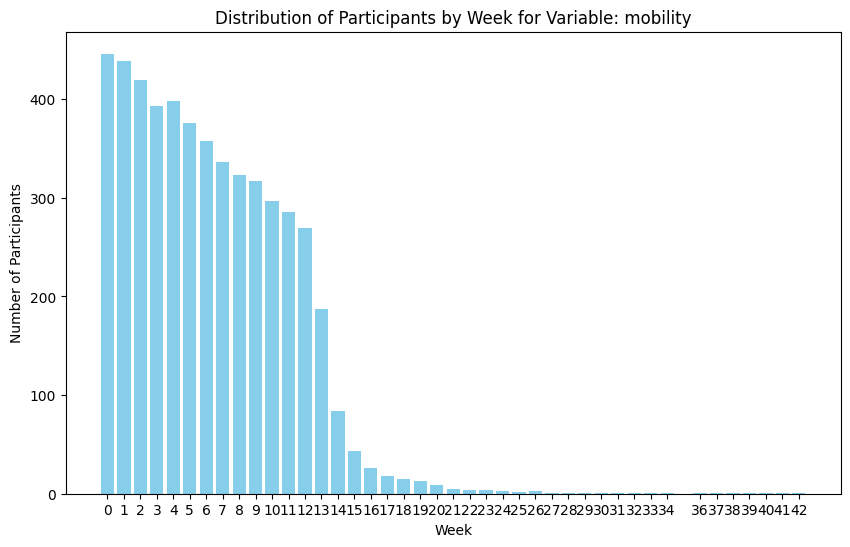

Filtered DataFrame shape: (207, 44)


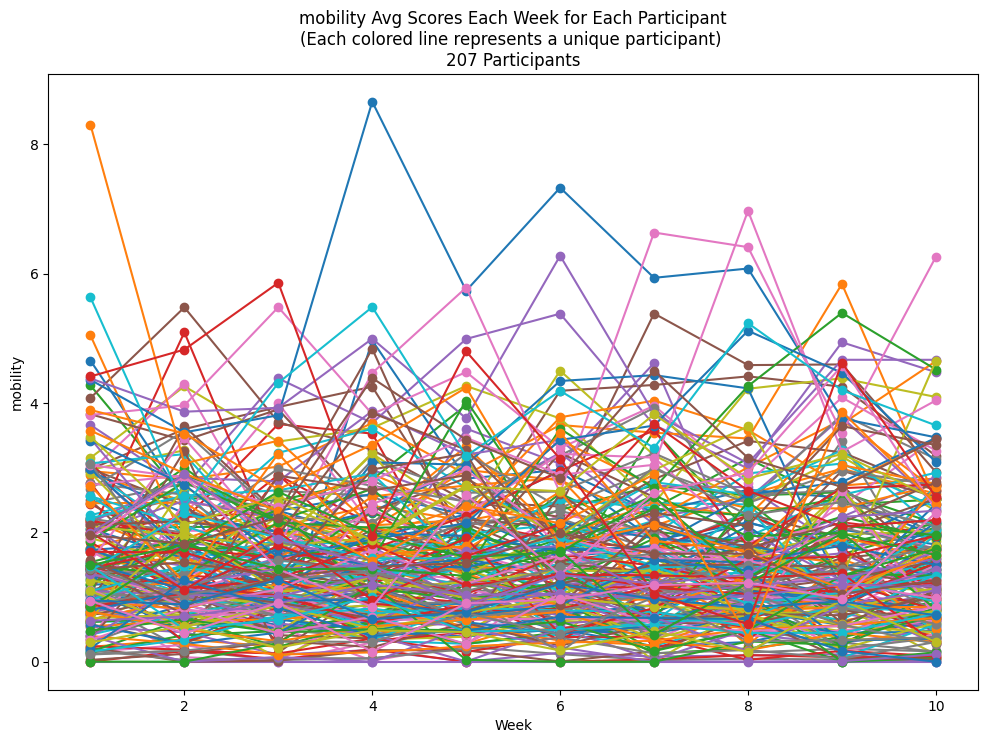

(207, 44)


In [ ]:
##### Cluster independent variables into high/low clusters

### MULTI-TIME DTW DISTANCE MATRIX 
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os

# Not using scaled versions of the dfs since it's not being compared to other variables
df_alldays_int70 = pd.read_csv(os.path.join(brighten_dir, 'scaled_df_alldays_int70.csv')) 
week_df_int70 = pd.read_csv(os.path.join(brighten_dir, 'week_df_int70.csv')) 


# Step 0: Choose a Y-variable to cluster & import data
cluster_var = 'mobility' #choose y_col
cluster_label = 'mobility_cluster'
required_weeks = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

filtered_df = cl.process_cluster_data(df_alldays_int70, cluster_var, required_weeks)
print(filtered_df.shape)


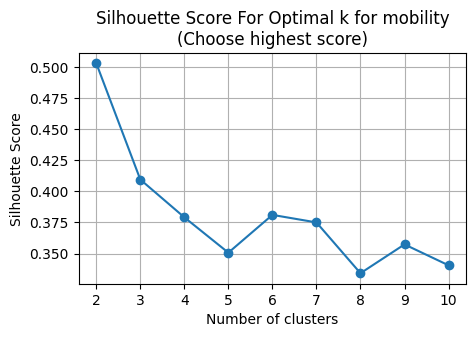

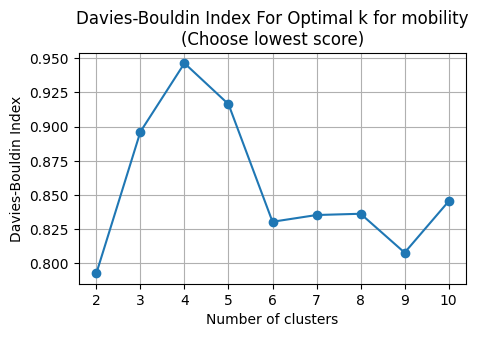

In [3]:
distance_matrix, embedding, results = cl.cluster_distance_analysis(filtered_df, required_weeks, cluster_var, n_clusters_range=range(1, 11))

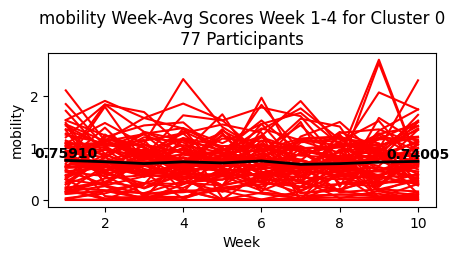

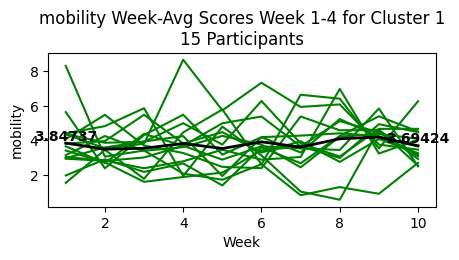

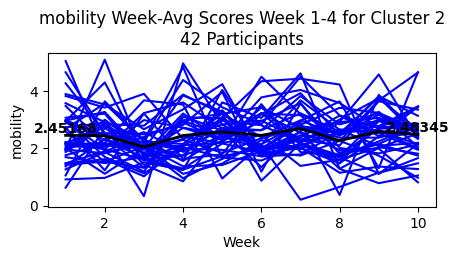

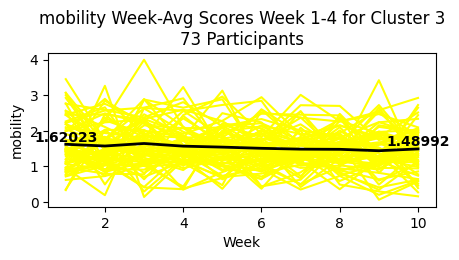

Cluster map for IDs to mobility_cluster (4 clusters) saved to mobility_cluster4_map.csv 


In [4]:
######### KMeans CLUSTERING for variable responses 
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from tslearn.metrics import cdist_dtw
from sklearn.cluster import DBSCAN
from tslearn.utils import to_time_series_dataset


# Step 1: Perform KMeans clustering
n_clusters=4
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(distance_matrix)

# Step 2: Add cluster labels to df
filtered_df[cluster_label] = kmeans.labels_
cluster_map = filtered_df[['num_id', cluster_label]].drop_duplicates()
cluster_df = df_alldays_int70.merge(cluster_map, on=['num_id'], how='left')


# Step 3: Visualize the clusters
colors = ['red', 'green', 'blue', 'yellow','orange','brown']

for c in range(n_clusters):
     # Create a new figure for each cluster
    fig, ax = plt.subplots(figsize=(5, 2))

    # Get indices of participants belonging to the current cluster
    cluster_indices = [i for i, label in enumerate(kmeans.labels_) if label == c]
    cluster_data = filtered_df[required_weeks].iloc[cluster_indices]
    
    # Plot each participant in the current cluster
    for i in cluster_indices:
        ax.plot(filtered_df[required_weeks].iloc[i], color=colors[c], label=f'Participant {i}' if i == cluster_indices[0] else "")
    
    # Plot the average for that cluster
    avg_line = cluster_data.mean(axis=0)  # Mean across rows for each week
    ax.plot(range(1, len(avg_line) + 1), avg_line, color='black', linewidth=2, label='Average')
    # Label the score at the beginning and end of the average line
    ax.text(1, avg_line.iloc[0], f"{avg_line.iloc[0]:.5f}", color='black', ha='center', va='bottom', fontweight='bold')
    ax.text(len(avg_line), avg_line.iloc[-1], f"{avg_line.iloc[-1]:.5f}", color='black', ha='center', va='bottom', fontweight='bold')
    
    # Add a legend with cluster labels and custom title
    ax.set_xlabel('Week')
    ax.set_ylabel(cluster_var)
    ax.set_title(f'{cluster_var} Week-Avg Scores Week 1-4 for Cluster {c}\n{len(cluster_indices)} Participants')
    
    # Show the plot for the current cluster
    plt.show()

cluster_map.to_csv(os.path.join(brighten_dir, f'{cluster_label}{n_clusters}_map.csv'))
print(f"Cluster map for IDs to {cluster_label} ({n_clusters} clusters) saved to {cluster_label}{n_clusters}_map.csv ")

phq9_sum in df
67 NOISE/low mobility_cluster participants
62 medium mobility_cluster participants
31 medium_high mobility_cluster participants
12 high mobility_cluster participants


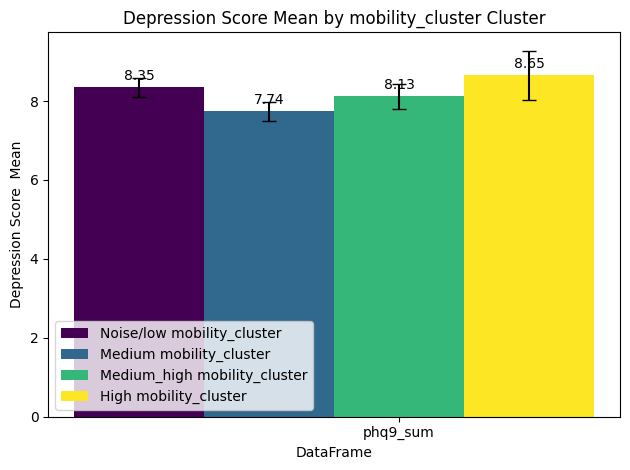

phq2_sum_int in df
67 NOISE/low mobility_cluster participants
64 medium mobility_cluster participants
31 medium_high mobility_cluster participants
12 high mobility_cluster participants


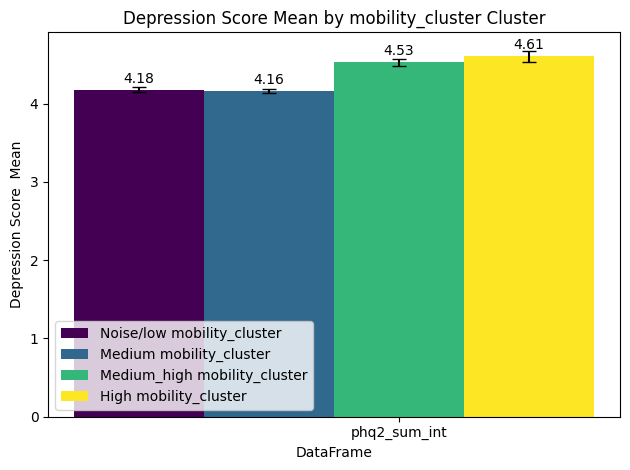

In [ ]:
#### Visualize distribution of certain variables for different clusters (KMeans)

# Dictionary to map cluster descriptions to cluster numbers
cluster_keys = {
    "NOISE/low": 0,
    #"medium_low": 3,
    "medium": 3,
    "medium_high": 2,
    "high":1
    # Add more mappings as needed, e.g., "med high": 0, "med": 1, "med low": 2, "low": 3
}
n_clusters = len(cluster_keys.keys())
# Initialize the cluster df by merging the cluster id-to-cluster mapping into the large df
cluster_map = pd.read_csv(os.path.join(brighten_dir, f'{cluster_label}{n_clusters}_map.csv'))
dfw_with_cluster = week_df_int70.merge(cluster_map, on=['num_id'], how='outer')

# Variable to compare
y_var, y_var_name = 'phq9_sum', 'Depression Score' #mood_1, sds_1, sds_2, sds_3, phq9_sum, phq2_sum
vis.plot_var_for_cluster(dfw_with_cluster, cluster_keys, cluster_var, cluster_label, y_var, y_var_name)

df_with_cluster = df_alldays_int70.merge(cluster_map, on=['num_id'], how='outer')
y_var, y_var_name = 'phq2_sum_int',  'Depression Score' #mood_1, sds_1, sds_2, sds_3, phq9_sum, phq2_sum
vis.plot_var_for_cluster(df_with_cluster, cluster_keys, cluster_var, cluster_label, y_var, y_var_name)


DTW distance matrix stats:
Min: 0.0
Max: 52.68671428571429
Mean: 10.904747777077645
eps: 1.75, clusters: 1, noise: 183
eps: 1.76, clusters: 1, noise: 183
eps: 1.76, clusters: 1, noise: 182
eps: 1.77, clusters: 1, noise: 182
eps: 1.77, clusters: 1, noise: 182
eps: 1.78, clusters: 1, noise: 182
eps: 1.78, clusters: 2, noise: 174
eps: 1.79, clusters: 2, noise: 174
eps: 1.79, clusters: 2, noise: 174
eps: 1.80, clusters: 2, noise: 174
eps: 1.80, clusters: 2, noise: 174
eps: 1.81, clusters: 2, noise: 174
eps: 1.81, clusters: 2, noise: 174
eps: 1.82, clusters: 2, noise: 174
eps: 1.82, clusters: 2, noise: 174
eps: 1.83, clusters: 1, noise: 174
eps: 1.83, clusters: 1, noise: 171
eps: 1.84, clusters: 1, noise: 171
eps: 1.84, clusters: 1, noise: 170
eps: 1.85, clusters: 1, noise: 170


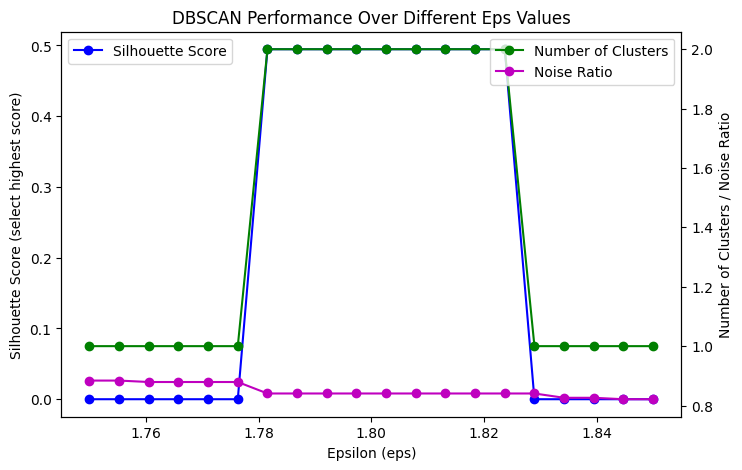

In [122]:
dtw_matrix, embedding, results = cl.cluster_dtw_analysis(filtered_df, required_weeks, eps_values=np.linspace(1.75, 1.85, 20), min_samples=10, verbose=True)

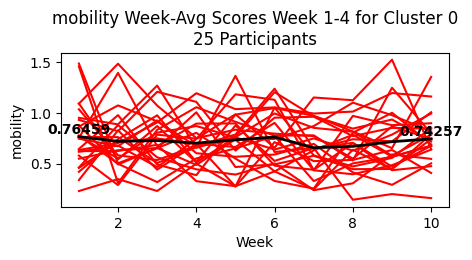

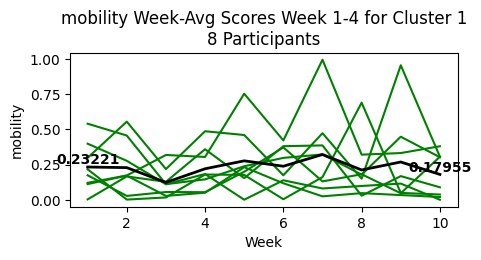

Cluster map for IDs to mobility_cluster (2 clusters) saved to mobility_cluster2_dbscan_map.csv 


In [123]:
######### DBSCAN CLUSTERING for variable responses 
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from tslearn.metrics import cdist_dtw
from sklearn.cluster import DBSCAN
from tslearn.utils import to_time_series_dataset


# Step 1: Perform DBSCAN clustering
dbscan = DBSCAN(eps=1.81, min_samples=10, metric='precomputed')
labels = dbscan.fit_predict(dtw_matrix)

# Count clusters (excluding noise)
unique_labels = set(labels) - {-1}
n_clusters = len(unique_labels)

# Add cluster labels to df 
filtered_df[cluster_label] = labels
cluster_map_dtw = filtered_df[['num_id', cluster_label]].drop_duplicates()
cluster_df = df_alldays_int70.merge(cluster_map_dtw, on=['num_id'], how='left')


# Step 3: Visualize the clusters
colors = ['red', 'green', 'blue', 'yellow','orange','brown']

for c in range(n_clusters):
     # Create a new figure for each cluster
    fig, ax = plt.subplots(figsize=(5, 2))

    # Get indices of participants belonging to the current cluster
    cluster_indices = [i for i, label in enumerate(labels) if label == c]
    cluster_data = filtered_df[required_weeks].iloc[cluster_indices]
    
    # Plot each participant in the current cluster
    for i in cluster_indices:
        ax.plot(filtered_df[required_weeks].iloc[i], color=colors[c], label=f'Participant {i}' if i == cluster_indices[0] else "")
    
    # Plot the average for that cluster
    avg_line = cluster_data.mean(axis=0)  # Mean across rows for each week
    ax.plot(range(1, len(avg_line) + 1), avg_line, color='black', linewidth=2, label='Average')
    # Label the score at the beginning and end of the average line
    ax.text(1, avg_line.iloc[0], f"{avg_line.iloc[0]:.5f}", color='black', ha='center', va='bottom', fontweight='bold')
    ax.text(len(avg_line), avg_line.iloc[-1], f"{avg_line.iloc[-1]:.5f}", color='black', ha='center', va='bottom', fontweight='bold')
    
    # Add a legend with cluster labels and custom title
    ax.set_xlabel('Week')
    ax.set_ylabel(cluster_var)
    ax.set_title(f'{cluster_var} Week-Avg Scores Week 1-4 for Cluster {c}\n{len(cluster_indices)} Participants')
    
    # Show the plot for the current cluster
    plt.show()

cluster_map_dtw.to_csv(os.path.join(brighten_dir, f'{cluster_label}{n_clusters}_dbscan_map.csv'))
print(f"Cluster map for IDs to {cluster_label} ({n_clusters} clusters) saved to {cluster_label}{n_clusters}_dbscan_map.csv ")

phq9_sum in df
20 low mobility_cluster participants
6 high mobility_cluster participants


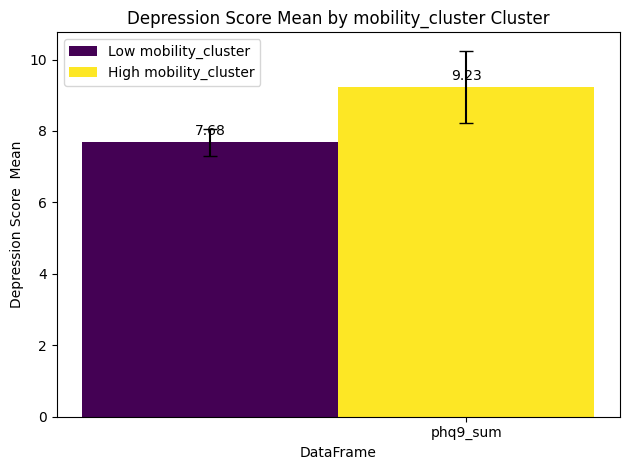

phq2_sum_int in df
20 low mobility_cluster participants
6 high mobility_cluster participants


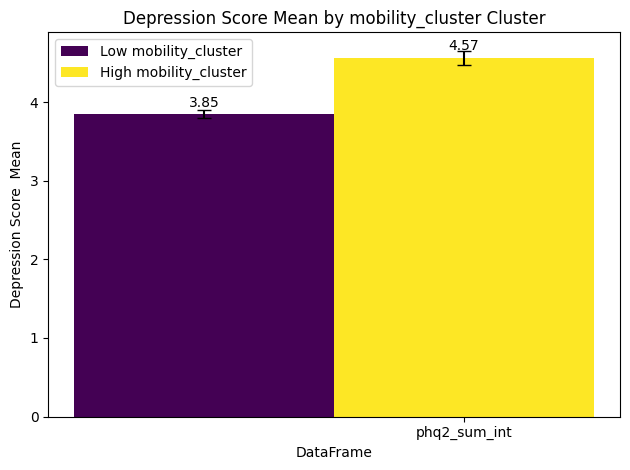

In [124]:
#### Visualize distribution of certain variables for different clusters (DBSCAN)

# Initialize the cluster df by merging the cluster id-to-cluster mapping into the large df
cluster_keys = {
    "low": 0,
    "high": 1,
    # Add more mappings as needed, e.g., "med high": 0, "med": 1, "med low": 2, "low": 3
}
cluster_map = pd.read_csv(os.path.join(brighten_dir, f'{cluster_label}{n_clusters}_dbscan_map.csv'))
dfw_with_cluster = week_df_int70.merge(cluster_map, on=['num_id'], how='outer')

# Variable to compare
y_var, y_var_name = 'phq9_sum', 'Depression Score' #mood_1, sds_1, sds_2, sds_3, phq9_sum, phq2_sum
vis.plot_var_for_cluster(dfw_with_cluster, cluster_keys, cluster_var, cluster_label, y_var, y_var_name)

df_with_cluster = df_alldays_int70.merge(cluster_map, on=['num_id'], how='outer')
y_var, y_var_name = 'phq2_sum_int',  'Depression Score' #mood_1, sds_1, sds_2, sds_3, phq9_sum, phq2_sum
vis.plot_var_for_cluster(df_with_cluster, cluster_keys, cluster_var, cluster_label, y_var, y_var_name)


In [38]:
# ##### Cluster subjects into network subtypes
# #### Save each sub's V1 symptom correlation distance matrix into v1_symptom_matrices

# def flatten_matrix(corr_matrix):
#     indices = []
#     for i in range(corr_matrix.shape[0]):
#         for j in range(i, corr_matrix.shape[1]):
#             if not i==j:
#                 indices.append([i,j])
#     return [corr_matrix.iloc[row, col] for row, col in indices]

# def upper_triangle(corr_matrix):
#     indices = []
#     for i in range(corr_matrix.shape[0]):
#         for j in range(i, corr_matrix.shape[1]):
#             if not i==j:
#                 indices.append([i,j])
#     return indices

# for name, df in d
# #full_df_v1 = full_df_v1.drop(columns='aggregate_communication_scaled')
# subs = full_df_v1['participant_id'].unique()
# print(f'In full_dt_v1 there are {len(subs)} subjects.')

# flattened_sub_matrices = {}
# v1_symptom_matrices = {}
# subs2 = []
# for sub in subs:
#     data = full_df_v1[full_df_v1['participant_id']==sub] # filter for each specific sub
#     # keep only numerical/changing columns
#     keep_columns = [var for var in full_df_v1.columns.to_list() if var.startswith('pc_')]
#     data = data[keep_columns] 
#     # transform into correlation matrix
#     correlation_matrix = data.corr() 
#     # Replace inf/-inf with NaN
#     correlation_matrix = correlation_matrix.replace([float('inf'), -float('inf')], pd.NA)  
#     # drop resulting NaNs
#     correlation_matrix = correlation_matrix.dropna() 
#     # add subs with non-empty matrices to subs2
#     if not correlation_matrix.empty:
#         subs2.append(sub) 
#          # add entire corr matrix to list
#         v1_symptom_matrices[sub] = correlation_matrix
#         # extract unique values from upper triangle into vector
#         vector = flatten_matrix(correlation_matrix) 
#          # add nonzero vector to list
#         if not len(vector)==0:
#             flattened_sub_matrices[sub] = vector

#         # # Heatmap
#         # plt.figure(figsize=(2, 1))
#         # sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.1f', linewidths=0.5)
#         # plt.title(f"{sub}")
#         # plt.show()

#     #     # Line/Scatter plot
#     #     x = np.arange(len(vector))
#     #     plt.figure(figsize=(2, 1))
#     #     plt.scatter(x, vector, label="Points", color="blue")

    
# # plt.show()


# print(len(flattened_sub_matrices.keys()), 'filled arrays')


# linkage_matrix = linkage(list(flattened_sub_matrices.values()), method='ward', metric='euclidean')
# dendrogram(linkage_matrix, labels=list(flattened_sub_matrices.keys()))
# plt.show()



In [39]:

# # Step 5: Perform clustering of subjects
# num_clusters = 5
# hierarchical_cluster = AgglomerativeClustering(
#     n_clusters=num_clusters,  # Number of clusters
#     linkage='ward'  # Linkage method
# )

# labels = hierarchical_cluster.fit_predict(linkage_matrix)
# print(labels)

# sub_clusters = dict(zip(flattened_sub_matrices.keys(), labels))